In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import math
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


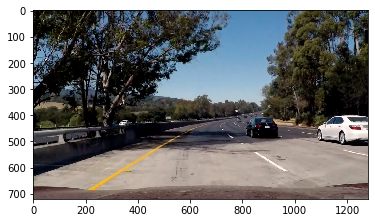

In [2]:
#reading in an image
image = mpimg.imread('test_images/test5.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [3]:
### Helper functions

def image_info(image):
    # Image info
    img_original = mpimg.imread(os.path.join('test_images/', image))
    img = np.copy(img_original)
    #img = mpimg.imread(os.path.join('test_images/', image))
    ysize = img.shape[0]
    xsize = img.shape[1]
    if DBG_LVL:
        print('\nFile: [', xsize, 'x', ysize, '] ', image)

## Load Images

0 ./camera_cal/calibration1.jpg
1 ./camera_cal/calibration10.jpg
2 ./camera_cal/calibration11.jpg
3 ./camera_cal/calibration12.jpg
4 ./camera_cal/calibration13.jpg
5 ./camera_cal/calibration14.jpg
6 ./camera_cal/calibration15.jpg
7 ./camera_cal/calibration16.jpg
8 ./camera_cal/calibration17.jpg
9 ./camera_cal/calibration18.jpg
10 ./camera_cal/calibration19.jpg
11 ./camera_cal/calibration2.jpg
12 ./camera_cal/calibration20.jpg
13 ./camera_cal/calibration3.jpg
14 ./camera_cal/calibration4.jpg
15 ./camera_cal/calibration5.jpg
16 ./camera_cal/calibration6.jpg
17 ./camera_cal/calibration7.jpg
18 ./camera_cal/calibration8.jpg
19 ./camera_cal/calibration9.jpg
0


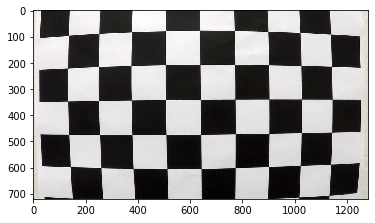

1


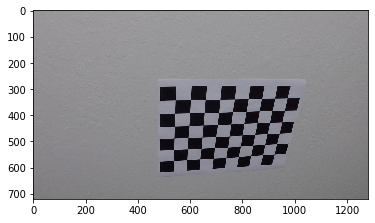

2


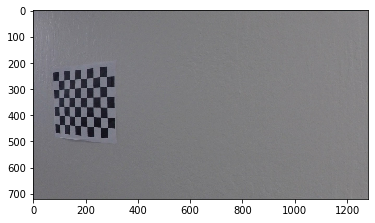

3


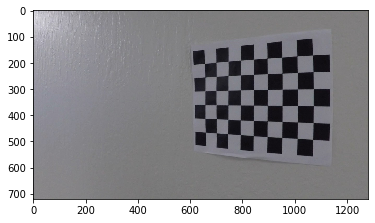

4


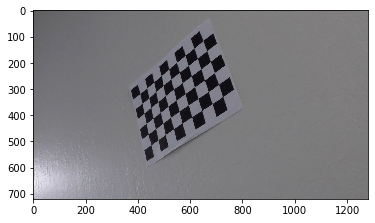

5


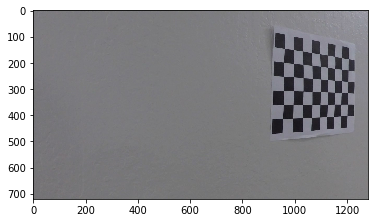

6


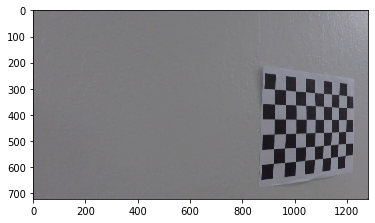

7


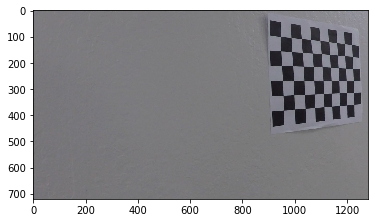

8


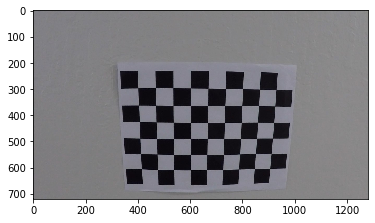

9


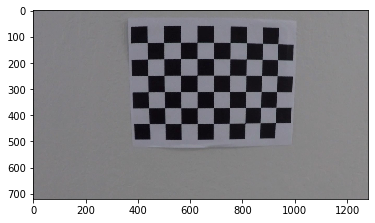

10


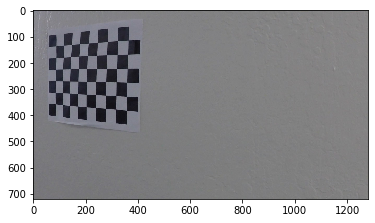

11


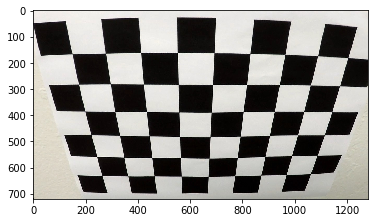

12


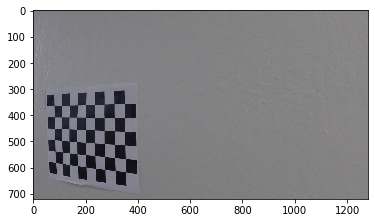

13


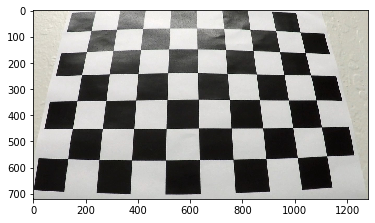

14


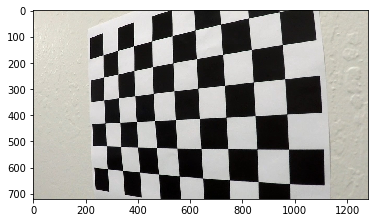

15


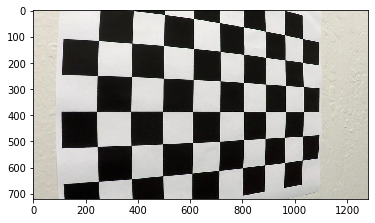

16


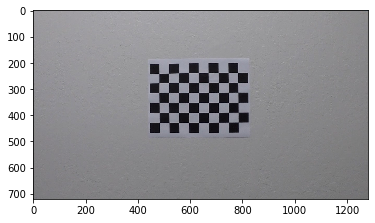

17


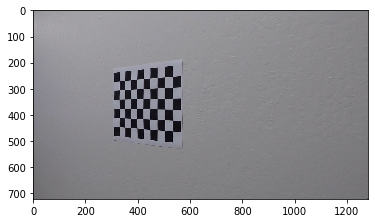

18


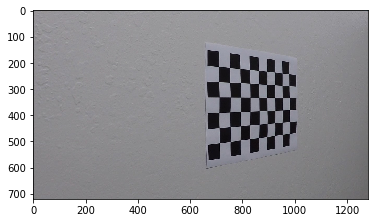

19


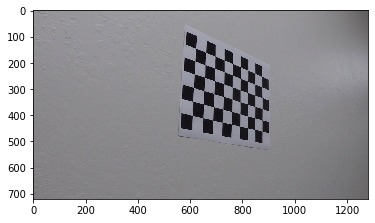

In [4]:
test_image_paths = glob.glob('./test_images/*.jpg')
calibration_image_paths = glob.glob('./camera_cal/*.jpg')
calibration_images = [] 

for idx, img_path in enumerate(calibration_image_paths):
    print(idx, img_path)
    

for idx, img in enumerate(calibration_image_paths):
    calibration_images.append(plt.imread(img))
    plt.imshow(calibration_images[idx])
    print(idx)
    plt.show()


## Camera Calibration

Columns  20
1
2
3
4
5
6
7
8
9
10
11
12
13
16
17
18
19
17 17


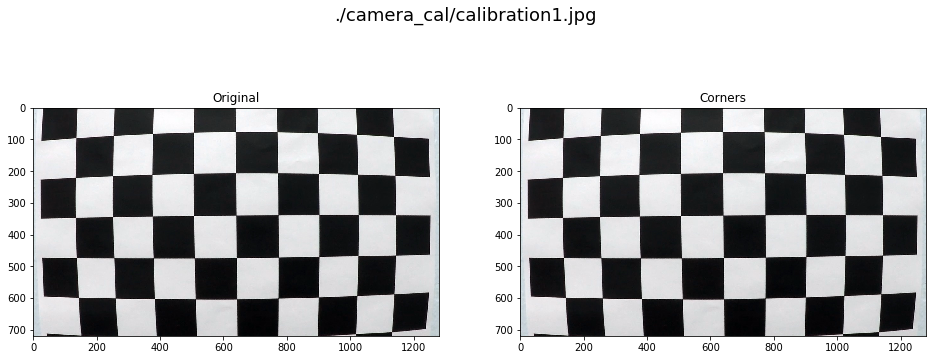

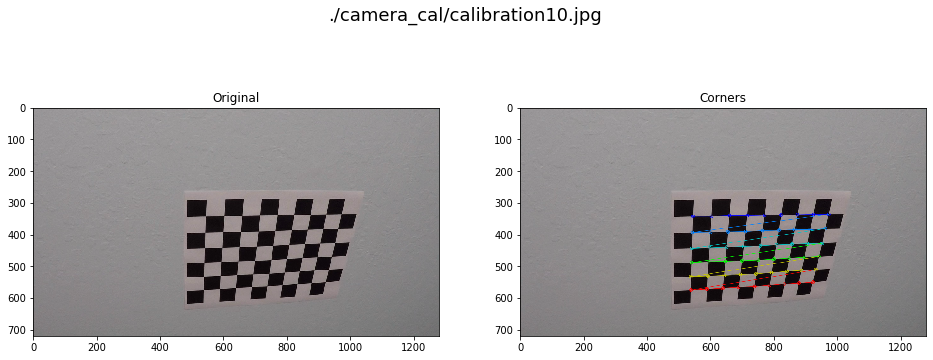

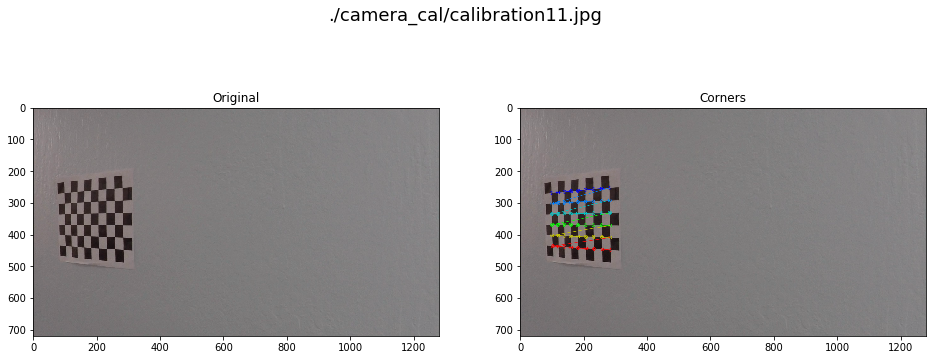

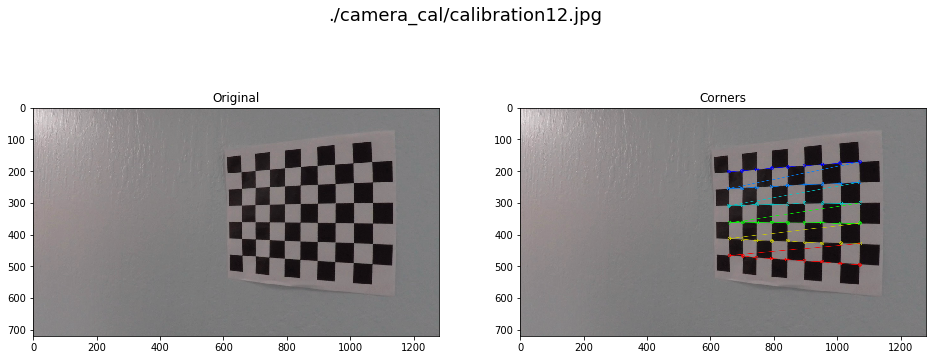

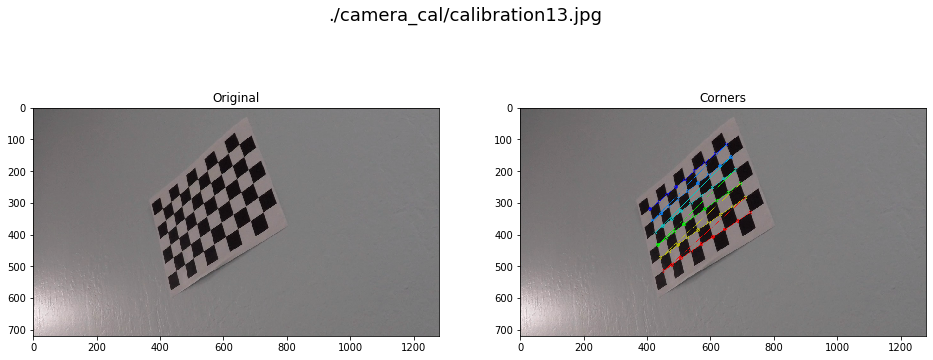

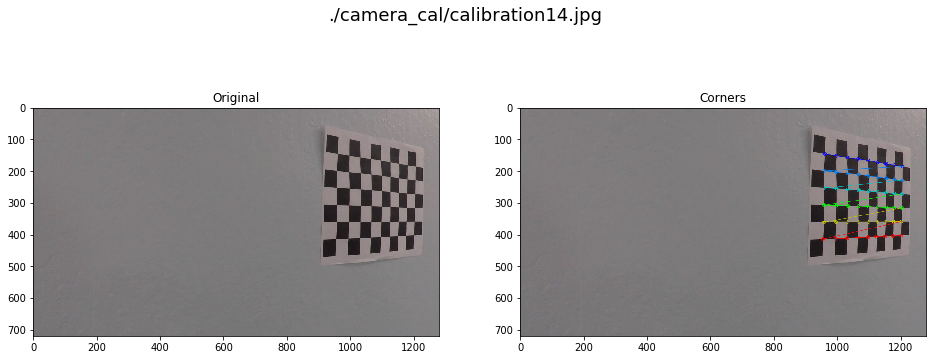

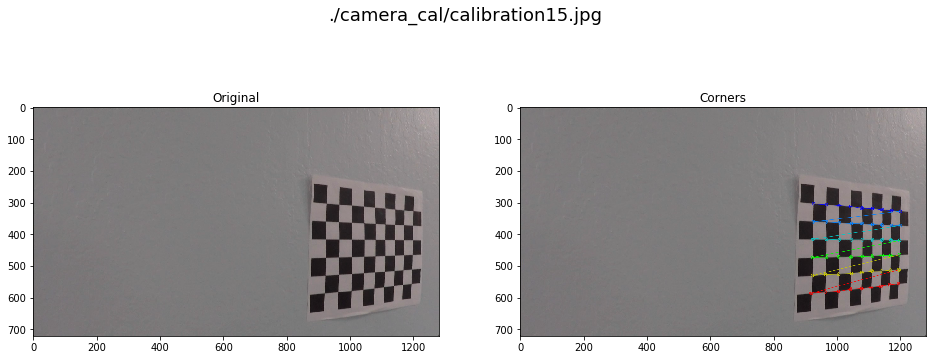

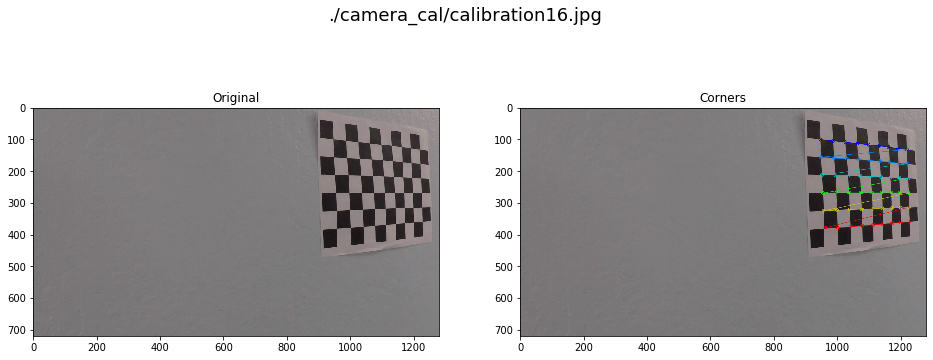

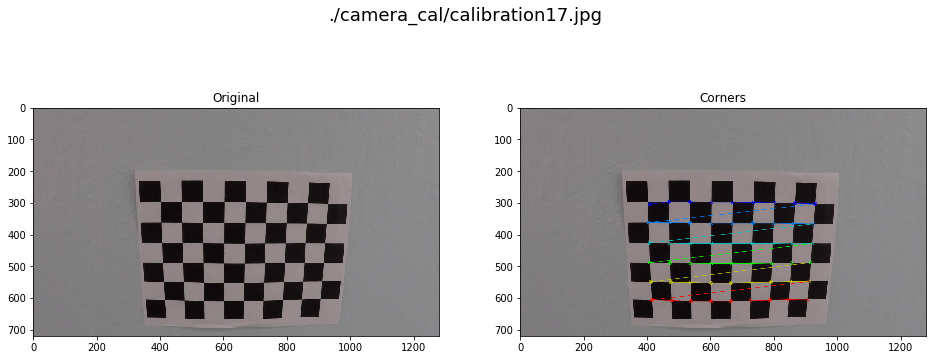

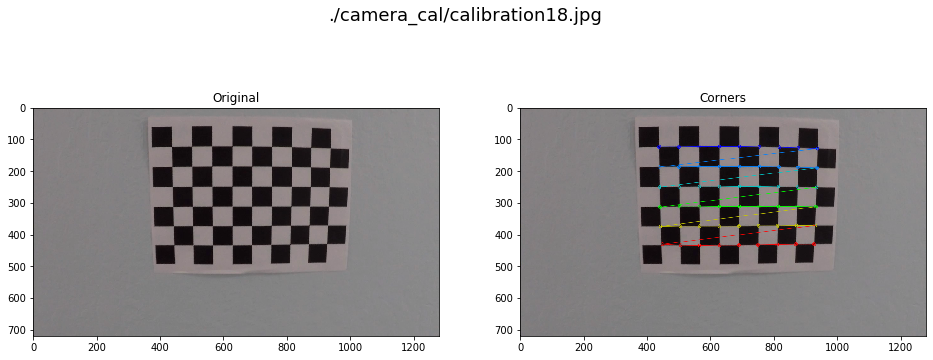

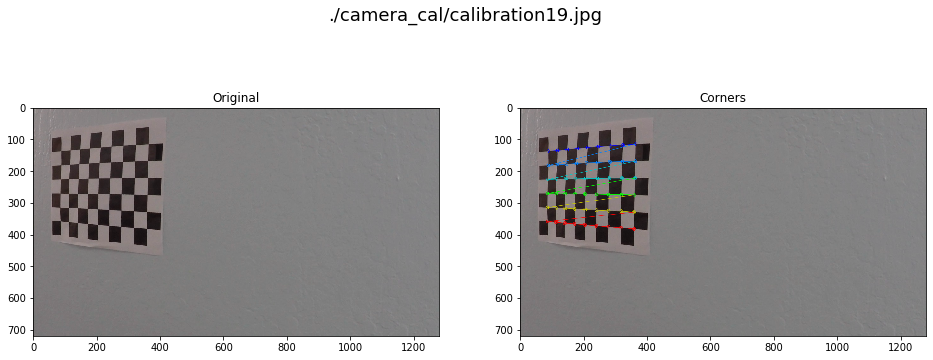

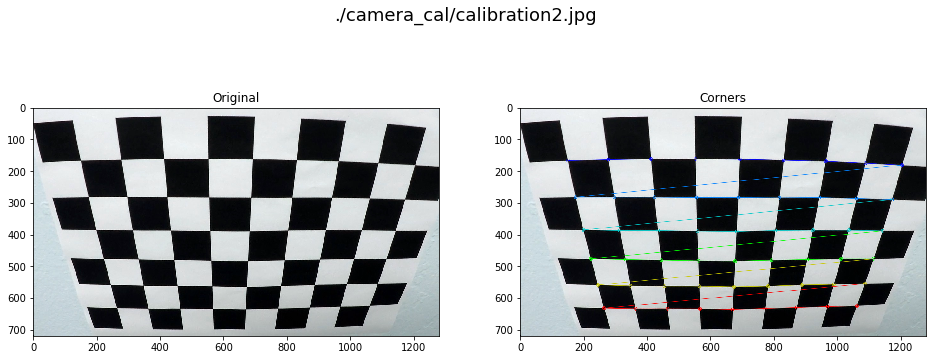

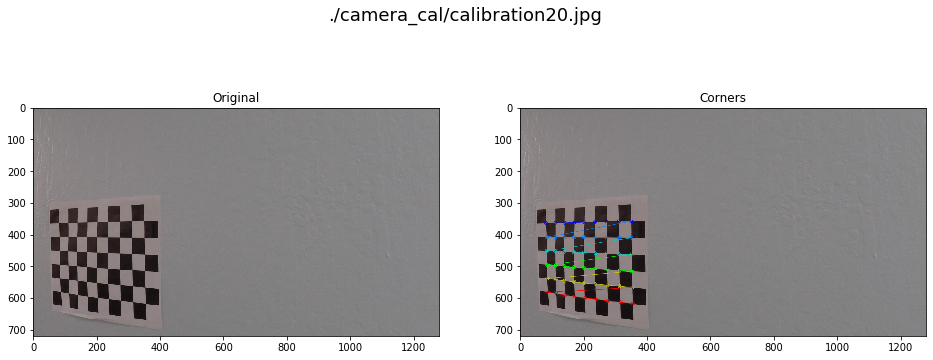

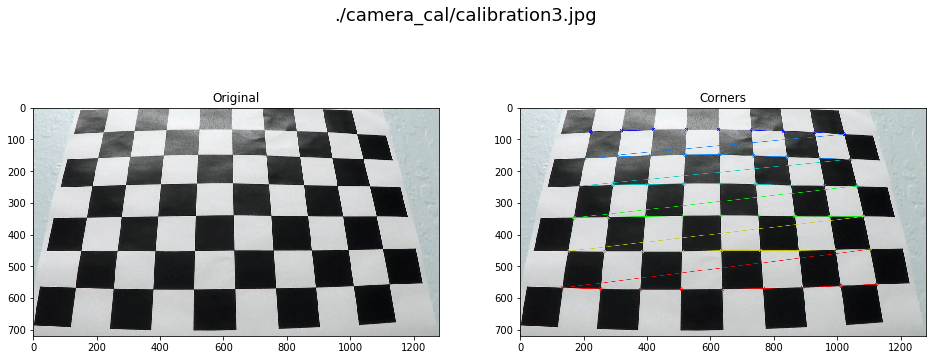

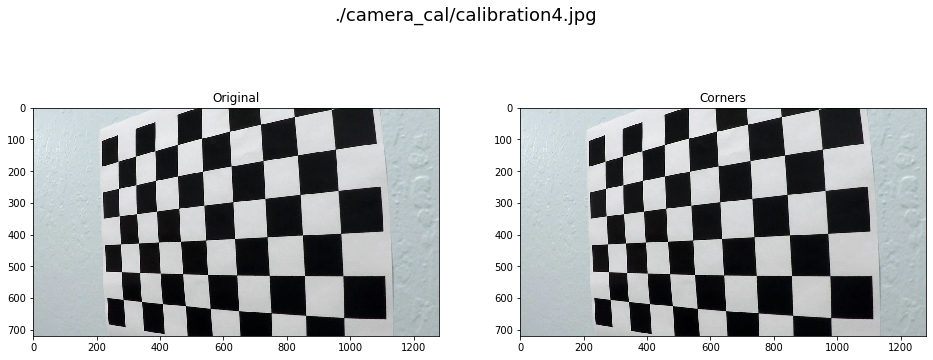

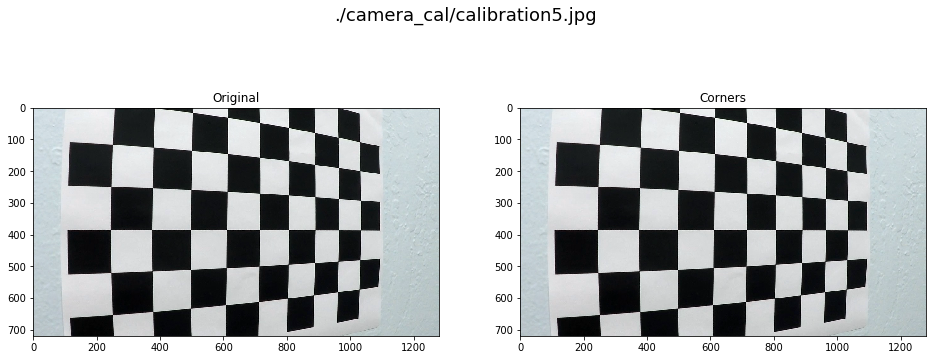

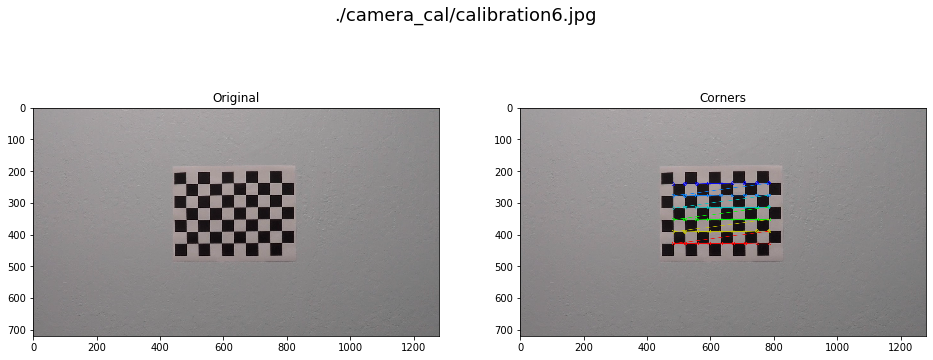

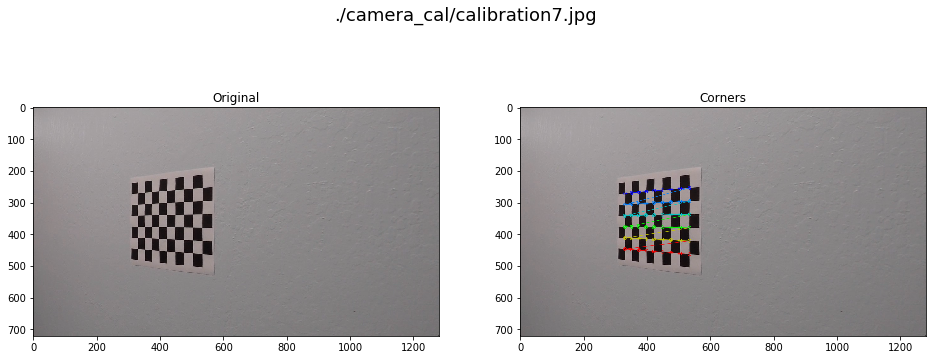

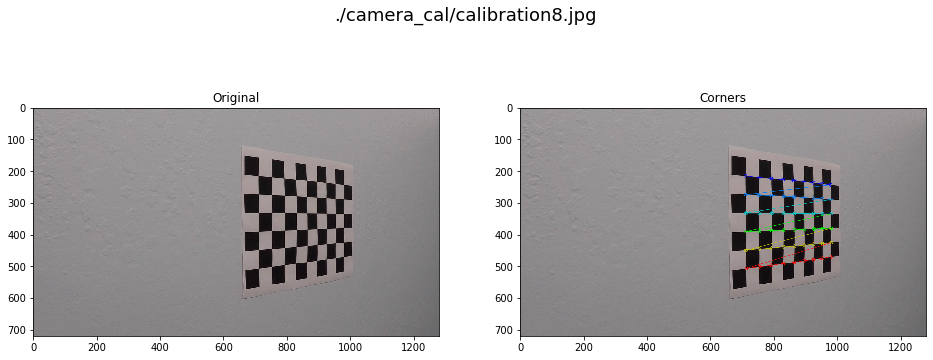

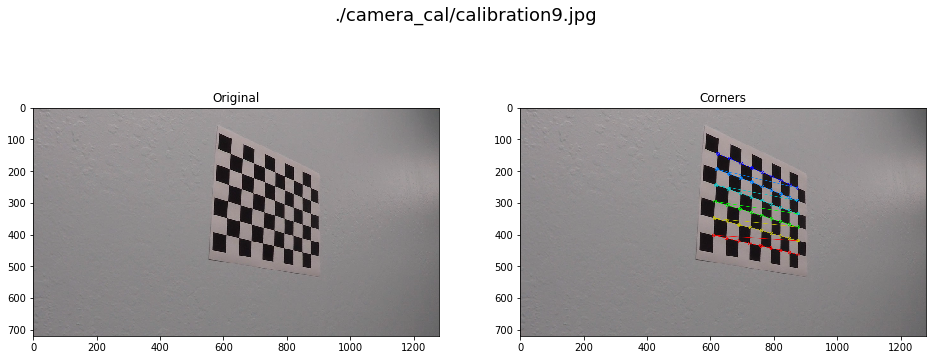

In [8]:
  
nx = 9
ny = 6

# Prepare object points
objp = np.zeros((nx*ny,3), np.float32) # Initialize nx*ny points with 3 columns for x,y,z
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) # Creates

# Arrays to store object points and image points
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane

# step through the list and search for chessboard corners
columns = len(calibration_images)
print('Columns ', columns)
found_corners = 0
failed_corners = 0
for idx, img_name in enumerate(calibration_image_paths):
    # Read image
    img_original = cv2.imread(img_name)
    img_copy = np.copy(img_original)
    
    fig = plt.figure(figsize=(16,6))
    FIG_ROWS = 1
    FIG_COLUMNS = 2
    a = fig.add_subplot(FIG_ROWS,FIG_COLUMNS,1)
    a.set_title('Original')
    a.imshow(img_original)
    
    # Convert to gray
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(img_gray, (nx,ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        print(idx)
        found_corners += 1
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners(img_copy, (nx, ny), corners, ret)
    else:
        failed_corners += 1
        
    b = fig.add_subplot(FIG_ROWS,FIG_COLUMNS,2)
    b.set_title('Corners')
    b.imshow(img_copy)
    plt.suptitle(img_name, fontsize=18, y=1)

print(len(objpoints),len(imgpoints))
cv2.destroyAllWindows()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

## Calibrate camera


Text(0.5, 1.0, 'Undistorted Image')

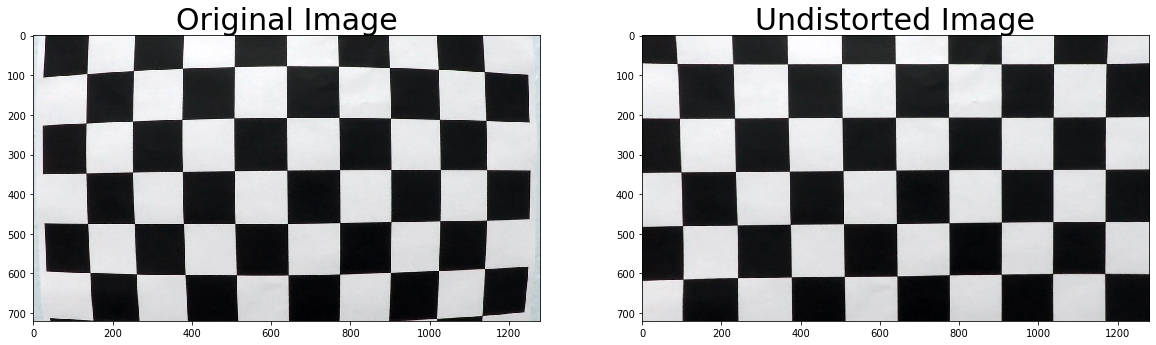

In [22]:
# Read in the test image
img_test = cv2.imread('./camera_cal/calibration1.jpg')

# Do camera calibration given object points and image points
img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                   imgpoints,
                                                   (img_gray.shape[1], img_gray.shape[0]),
                                                   None,
                                                   None)

img_dst = cv2.undistort(img_test, mtx, dist, None, mtx)
#cv2.imwrite('calibration_wide/test_undist.jpg',dst)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img_test)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_dst)
ax2.set_title('Undistorted Image', fontsize=30)